### STAGE 1 DATASET SELECTION AND EXPLORATION ###

In [7]:
# Import necessary libraries
import pandas as pd


# Load the dataset
df = pd.read_csv("restaurant_menu_optimization_data.csv", sep=';',  on_bad_lines='skip', encoding='utf-8')
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [8]:
# Display the first few rows of the dataset
print(df.head())

  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients  Price Profitability  
0                                   ['confidential']   2.55           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']  11.12        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  18.66          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  29.55          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  17.73        Medium  


In [9]:
# Summary statistics of the dataset
print(df.describe())

            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


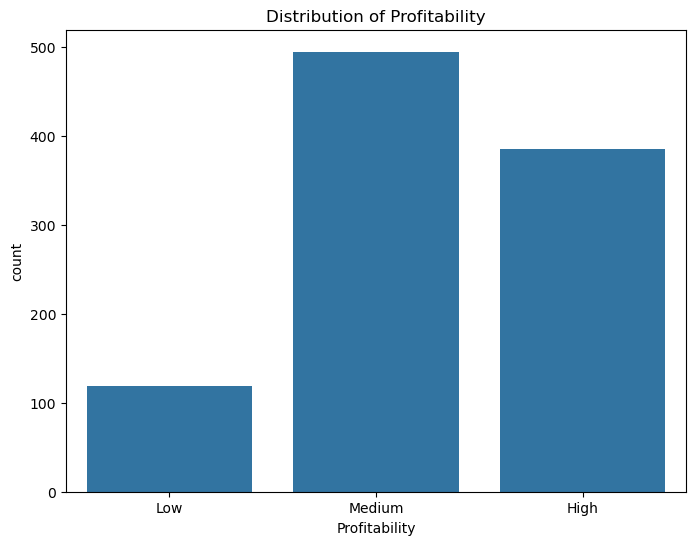

In [10]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Profitability')
plt.title('Distribution of Profitability')
plt.show()

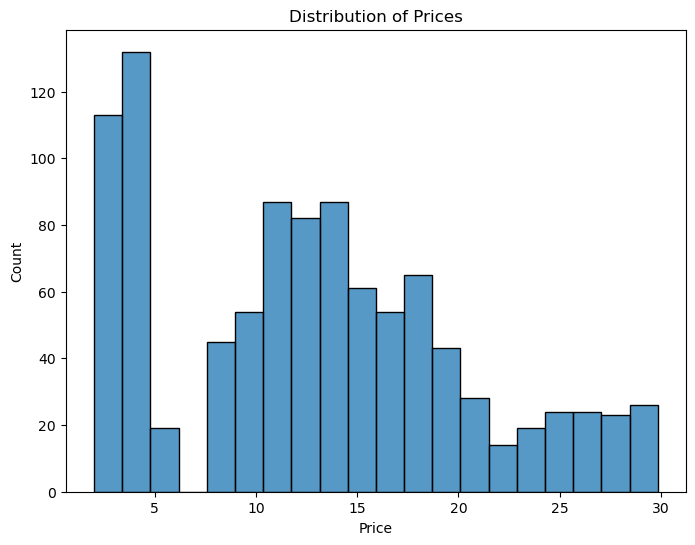

In [11]:
# Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20)
plt.title('Distribution of Prices')
plt.show()

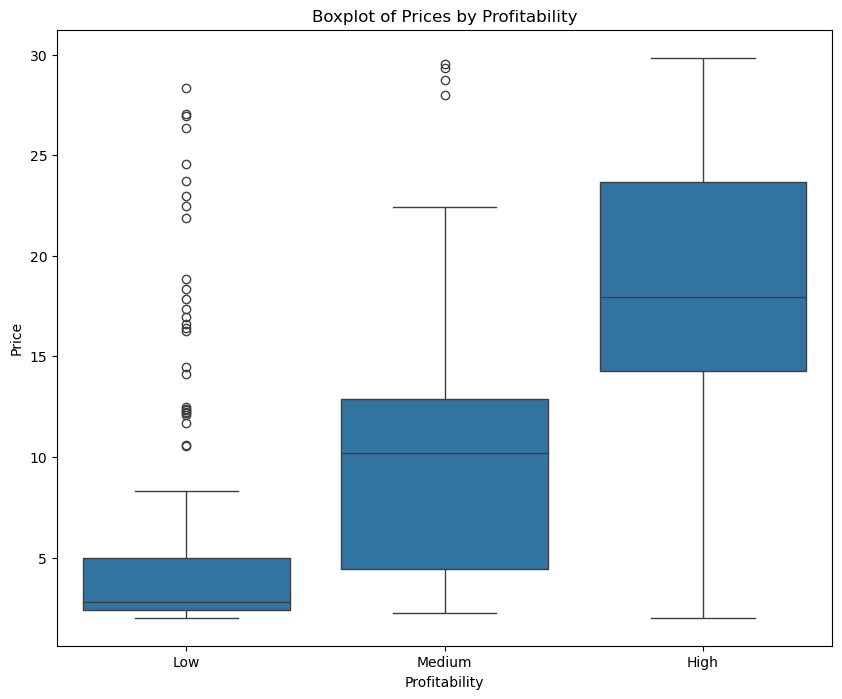

In [12]:
# Boxplot of prices by profitability
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Profitability', y='Price')
plt.title('Boxplot of Prices by Profitability')
plt.show()

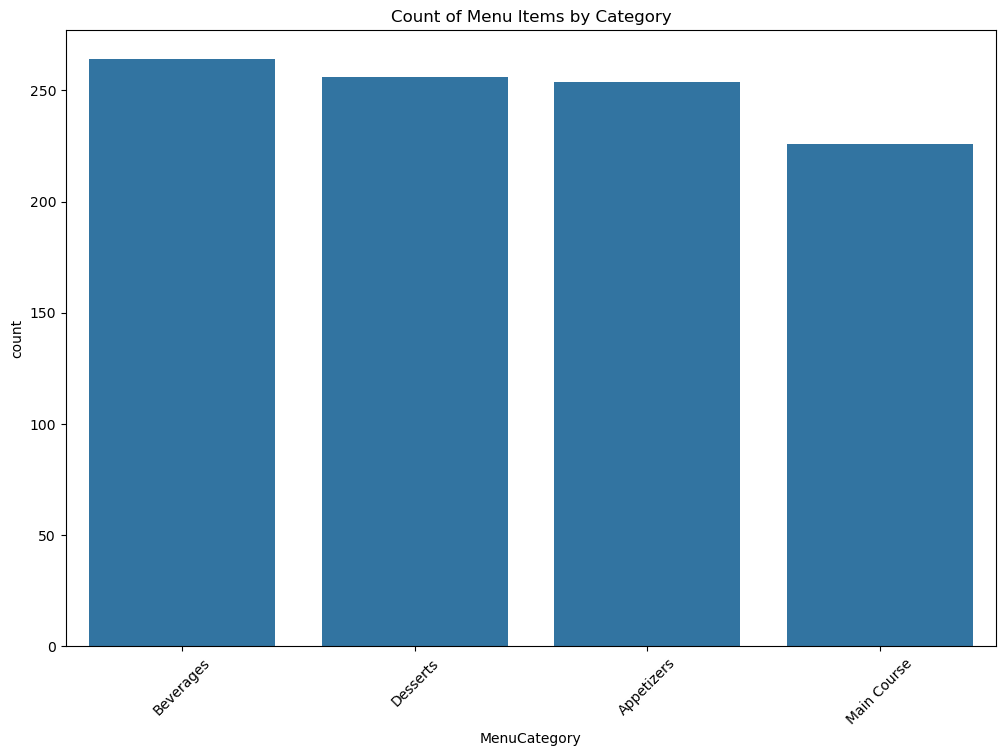

In [13]:
# Count of menu items by category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='MenuCategory', order=df['MenuCategory'].value_counts().index)
plt.title('Count of Menu Items by Category')
plt.xticks(rotation=45)
plt.show()

## STAGE 2 DATA PREPROCESSING ###

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
le_profitability = LabelEncoder()
df['Profitability'] = le_profitability.fit_transform(df['Profitability'])

le_menu_category = LabelEncoder()
df['MenuCategory'] = le_menu_category.fit_transform(df['MenuCategory'])

# Drop unnecessary columns
df.drop(['RestaurantID', 'MenuItem', 'Ingredients'], axis=1, inplace=True)

# Split the dataset into features and target variable
X = df.drop('Profitability', axis=1)
y = df['Profitability']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### STAGE 3 MODEL TRAINING AND COMPARISON ###

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [16]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.00      0.00      0.00        25
           2       0.75      0.92      0.83        98

    accuracy                           0.79       200
   macro avg       0.53      0.60      0.56       200
weighted avg       0.69      0.79      0.73       200



c:\Users\LENOVO\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\dateng\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.60      0.48      0.53        25
           2       0.86      0.87      0.86        98

    accuracy                           0.82       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.81      0.82      0.82       200



In [18]:
# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        77
           1       0.68      0.52      0.59        25
           2       0.87      0.92      0.89        98

    accuracy                           0.85       200
   macro avg       0.81      0.77      0.78       200
weighted avg       0.84      0.85      0.85       200



In [19]:
# Cross-validation to validate the performance
cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
cv_scores_dt = cross_val_score(dt, X_scaled, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')

In [20]:
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean()}")
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean()}")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean()}")

Logistic Regression CV Accuracy: 0.794
Decision Tree CV Accuracy: 0.85
Random Forest CV Accuracy: 0.873


In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Performance after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Performance after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        77
           1       0.87      0.52      0.65        25
           2       0.89      0.98      0.93        98

    accuracy                           0.90       200
   macro avg       0.89      0.80      0.83       200
weighted avg       0.89      0.90      0.89       200

